In [11]:
import math
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(12,6))

In [79]:
X, y = make_classification(n_samples=1000, n_features=10)
np.unique(y, return_counts=True)

(array([0, 1]), array([500, 500]))

## Vanilla Python

In [82]:
def py_accuracy(y_pred, y):
    size = len(y)
    result = 0
    for i in range(size):
        result += round(y_pred[i]) == y[i]
    return result / size
    
def py_dot_product(vec1, vec2):
    size = len(vec1)
    result = [0] * size
    for i in range(size):
        result[i] = vec1[i] * vec2[i]
    return sum(result)
    
    
def py_sigmoid(x):
    return 1 / (1 + math.e**-x)

def py_forward(w, X):
    size = len(X)
    predict = [0] * size
    for i in range(size):
        dot = py_dot_product(X[i], w)
        predict[i] = py_sigmoid(dot)
    return predict

def py_loss(predict, y):
    size = len(y)
    result = 0
    for i in range(size):
        p_1 = -y[i] * math.log(predict[i])
        p_0 = -(1 - y[i]) * math.log(1 - predict[i])
        result += p_0 + p_1
    return result / size

# Jacobian is the same
def py_grad(predict, X, y):
    size = len(y)
    column_size = len(X[0])
    grad = [0] * column_size
    for i in range(size):
        vals = [0] * column_size
        for j in range(column_size):
            grad[j] += (predict[i] - y[i]) * X[i][j]
    return grad

def py_update_params(w, grad, lr):
    return [w[i] - lr * grad[i] for i in range(len(w))]

In [98]:
py_X = np.insert(X, 0, 1, axis=1).tolist()
py_y = y.tolist()
py_w = [0]*len(py_X[0])

In [99]:
n_iter = 100
history = [0] * n_iter
accuracy = [0] * n_iter
for i in range(n_iter):
    pred = py_forward(py_w, py_X)
    history[i] = py_loss(pred, py_y)
    accuracy[i] = py_accuracy(pred, py_y)
    grad = py_grad(pred, py_X, py_y)
    py_w = py_update_params(py_w, grad, 0.001)

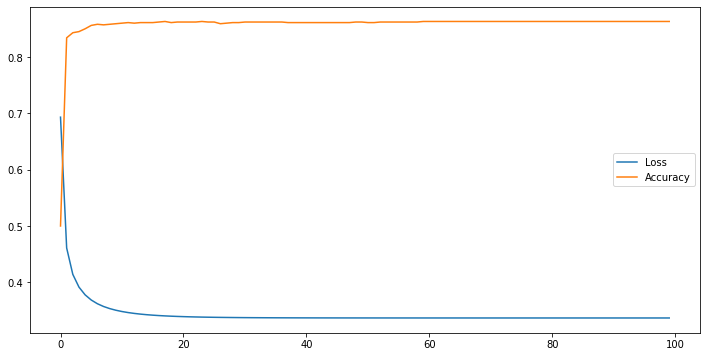

In [102]:
plt.plot(history)
plt.plot(accuracy)
plt.legend(["Loss", "Accuracy"])
plt.show()